In [4]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

def read_log(filename):
    with open(filename, encoding='utf-8', errors='ignore') as f:
        lines = f.readlines()
    # last line is win_ratio: x.x, average steps: x.x, average invalid steps: x.x.
    if len(lines[-1].strip()[:-1].split(', ')) != 3:
        return None, None, None
    
    win_ratio, avg_steps, avg_invalid_steps = lines[-1].strip()[:-1].split(', ')
    win_ratio = float(win_ratio.split(': ')[1])
    avg_steps = float(avg_steps.split(': ')[1])
    avg_invalid_steps = float(avg_invalid_steps.split(': ')[1])
    return win_ratio, avg_steps, avg_invalid_steps

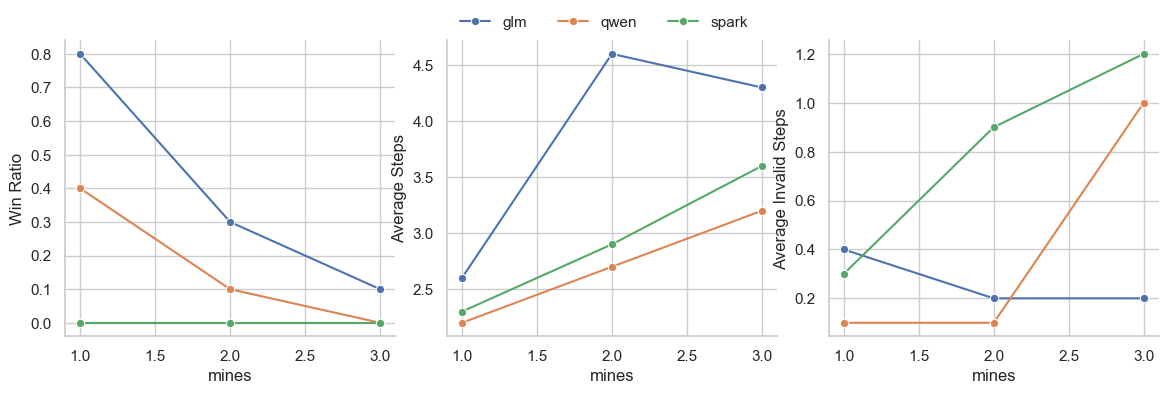

In [25]:
dfs = []

# read all log files
for filename in os.listdir('logs'):
    if filename.endswith('.log'):
        # filename is <model_file>_<size>_<mines>.log
        model, size, mines = filename[:-4].split('_')
        size, mines = int(size), int(mines)
        win_ratio, avg_steps, avg_invalid_steps = read_log(os.path.join('logs', filename))
        if win_ratio is None:
            print(f'Error reading {filename}')
            continue
        
        # append to dataframe
        dfs.append(pd.DataFrame({
            'model': [model],
            'size': [size],
            'mines': [mines],
            'win_ratio': [win_ratio],
            'avg_steps': [avg_steps],
            'avg_invalid_steps': [avg_invalid_steps]
        }))
        
df = pd.concat(dfs, ignore_index=True)
df = pd.melt(df, id_vars=['model', 'size', 'mines'], value_vars=['win_ratio', 'avg_steps', 'avg_invalid_steps'], var_name='metric', value_name='value')

# draw line plot with different models
# x: mines
# y: win_ratio, avg_steps, avg_invalid_steps
# hue: model
# facetgrid
sns.set_theme(style='whitegrid')
g = sns.FacetGrid(df, col='metric', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'mines', 'value', 'model', marker='o')
# position on top
g.add_legend(loc='upper center', bbox_to_anchor=(0.42, 1.0), ncol=3)

# remove title
for ax in g.axes.flat:
    ax.set_title('')

# set y 
g.axes[0].set_ylabel('Win Ratio')
g.axes[1].set_ylabel('Average Steps')
g.axes[2].set_ylabel('Average Invalid Steps')

plt.savefig('models.png', bbox_inches='tight')
